In [1]:
import pandas as pd

# Load the dataset
data = pd.read_csv('Housing.csv')


In [2]:
# Show the first few rows of the dataset
print(data.head())

# Show summary statistics
print(data.describe())

# Show information about the dataset
print(data.info())


      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  
              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545

In [3]:
data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [4]:
data.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [5]:
from sklearn.preprocessing import LabelEncoder
def encode (data,feature):
    encoder = LabelEncoder()
    data[feature] = encoder.fit_transform(data[feature])
    return data[feature]

In [6]:
encode(data,'mainroad')
encode(data,'guestroom')
encode(data,'basement')
encode(data,'airconditioning')
encode(data,'prefarea')
encode(data,'furnishingstatus')
encode(data,'hotwaterheating')

0      0
1      0
2      0
3      0
4      0
      ..
540    0
541    0
542    0
543    0
544    0
Name: hotwaterheating, Length: 545, dtype: int32

In [7]:
data.dtypes

price               int64
area                int64
bedrooms            int64
bathrooms           int64
stories             int64
mainroad            int32
guestroom           int32
basement            int32
hotwaterheating     int32
airconditioning     int32
parking             int64
prefarea            int32
furnishingstatus    int32
dtype: object

<Axes: >

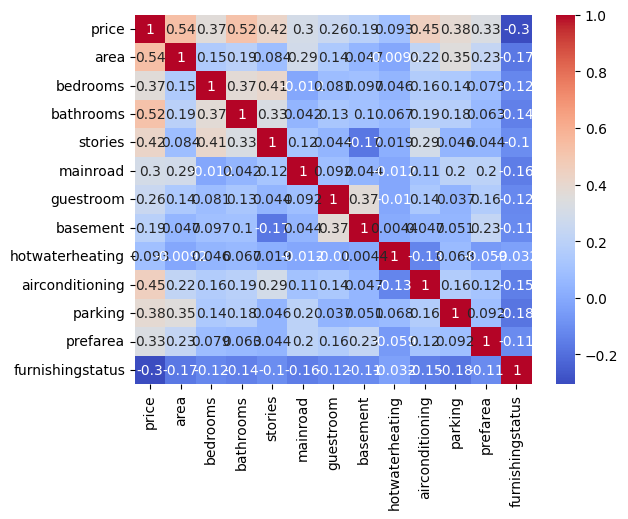

In [8]:
import seaborn as sns
cordata=data.corr()
sns.heatmap(cordata,annot=True,cmap='coolwarm')

In [9]:
data.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [10]:
x= data.drop(columns=['price'])
y=data['price']

In [11]:
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

from sklearn.tree import DecisionTreeClassifier

tree=DecisionTreeClassifier()

tree.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [12]:
y_pred=tree.predict(xtest)
y_pred

array([3990000, 3850000, 3850000, 4935000, 3990000, 5880000, 3773000,
       4550000, 1855000, 2520000, 8400000, 2695000, 3115000, 3703000,
       4865000, 4200000, 3850000, 7962500, 2870000, 4270000, 5075000,
       5523000, 2345000, 7455000, 5005000, 5250000, 3465000, 3885000,
       9870000, 3920000, 8400000, 2800000, 8463000, 5250000, 2485000,
       4480000, 4900000, 5250000, 3115000, 3885000, 5145000, 2653000,
       3850000, 4585000, 2730000, 4200000, 7560000, 4165000, 2450000,
       3430000, 6895000, 3150000, 4480000, 3990000, 4200000, 2520000,
       5075000, 3465000, 5250000, 3360000, 5215000, 4200000, 4270000,
       4200000, 2870000, 4550000, 6419000, 3465000, 8400000, 5565000,
       3150000, 5250000, 4480000, 7000000, 2653000, 3500000, 3780000,
       5565000, 5110000, 3010000, 8540000, 4480000, 4060000, 4795000,
       3465000, 4060000, 3465000, 4515000, 7420000, 7350000, 2275000,
       6930000, 3500000, 3115000, 8960000, 4007500, 4900000, 4200000,
       2870000, 5950

In [13]:

new_data = pd.DataFrame({
    'area': [8000],
    'bedrooms': [4],
    'bathrooms': [3],
    'stories': [2],
    'mainroad': [1],             
    'guestroom': [0],
    'basement': [0],
    'hotwaterheating': [0],
    'airconditioning': [1],
    'parking': [2],
    'prefarea': [1],
    'furnishingstatus': [2]      
})

# Predict prices
predicted_prices = tree.predict(new_data)
print("The new house price is :",predicted_prices)


The new house price is : [6895000]
